# Datareader y Bitcoin

## Instalando libreria pandas_datareader

In [1]:
!pip install pandas_datareader # libreria necesaria para obtener datos de fuente externa

## Activando las librerias necesarias

In [2]:
import pandas as pd # libreria pandas para generar el dataframe
import pandas_datareader as data # libreria pandas_datareader para obtener datos de fuente externa
import datetime as dt # libreria datetime para manipular datos de fecha
import matplotlib.pyplot as plot # libreria para graficos basicos
import numpy as np # libreria para calculos matematicos avanzados

## Obteniendo datos del Bitcoin, de Yahoo! Finances

In [3]:
BTC = data.DataReader("BTC-USD", start='2016-01-01', end='2020-05-01', data_source='yahoo') # obtención de datos del bitcoin

## Creando el dataframe btc, con pandas

In [4]:
btc = pd.DataFrame(BTC) # creación del dataframe btc
btc.head() # visualización de los cinco primeros registros del dataframe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,34522600,431.959991


## Limpiando el dataframe, insertando columnas y creando datos

In [5]:
Date = btc.index.values # creacion de la variable Date con los valores consignados como nombres de filas
btc.insert(0, column='Date', value=Date) # creacion en el dataframe de la columna Date en primer lugar con los valores anteriores
btc.reset_index(drop=True, inplace=True) # reseteo de los valores consignados como nombres de filas
btc['Day']=pd.DatetimeIndex(btc['Date']).day_name() # creación de la columna Day con los nombres del dia

## Tamaño del dataframe, en filas y columnas

In [6]:
btc.shape

(1584, 8)

## Cambiando el nombre de las columnas, creando valores para el Retorno y obteniendo info

In [7]:
btc.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) # cambio el nombre para los algoritmos siguientes
btc['Return']=btc.Adj_Close.pct_change() # diferencia entre n y n-1 en el precio del cierre ajustado
btc.info() # informacion del dataframe btc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 9 columns):
Date         1584 non-null datetime64[ns]
High         1584 non-null float64
Low          1584 non-null float64
Open         1584 non-null float64
Close        1584 non-null float64
Volume       1584 non-null int64
Adj_Close    1584 non-null float64
Day          1584 non-null object
Return       1583 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 111.5+ KB


# Graficas básicas

## Cierre ajustado y Retorno en grafico doble

[Text(0, 0.5, 'Retorno')]

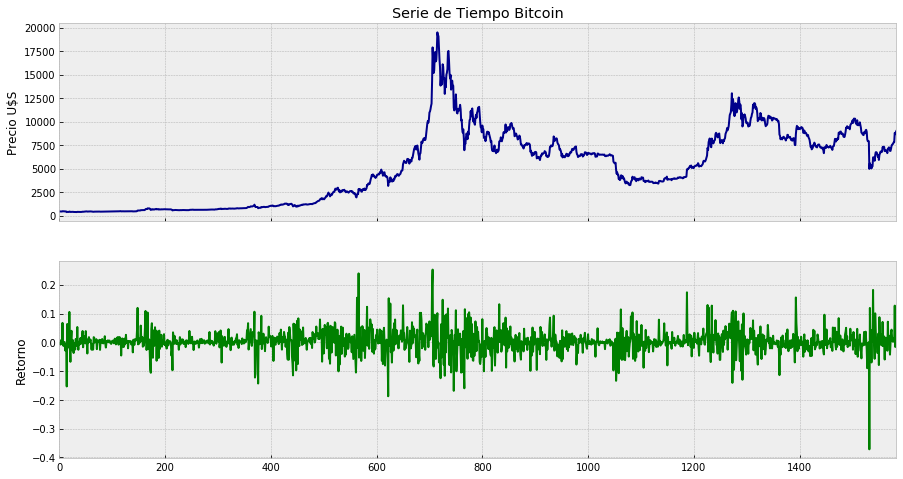

In [8]:
plot.style.use('bmh') # uno de los estilos disponibles para graficos
fix, ax = plot.subplots(2,1, figsize=(15,8), sharex=True) # configuracion de las figuras, y cantidad de graficos

btc.Adj_Close.plot(ax=ax[0], color=['darkblue']) # primer grafico del cierre ajustado, en azul
ax[0].set(title='Serie de Tiempo Bitcoin', ylabel='Precio U$S') # titulos del grafico y del eje Y

btc.Return.plot(ax=ax[1], color=['green']) # segundo grafico del retorno, en verde
ax[1].set(ylabel='Retorno') # titulos del eje Y

## Datos atipicos del Retorno

In [9]:
btc_rolling = btc[['Return']].rolling(window=21).agg(['mean', 'std'])
btc_rolling.columns = btc_rolling.columns.droplevel()

In [10]:
btc_outliers = btc.join(btc_rolling) # dataframe btc para datos atipicos (outliers)

In [11]:
def indentify_outliers(row, n_sigmas=3): # funcion identificar atipicos
    x = row['Return'] # creación de la variable x con los valores del Retorno
    mu = row['mean'] # creación de la variable mu con la media de los valores del Retorno
    sigma = row['std'] # creación de la variable sigma con el desvio estandar de los valores del Retorno
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma): # si x es mayor o menor a la media + ó - 3 veces el desvio estandar
        return 1
    else:
        return 0

In [12]:
btc_outliers['outlier'] = btc_outliers.apply(indentify_outliers, axis=1)                                                                                                       
outliers = btc_outliers.loc[btc_outliers['outlier'] == 1, ['Return']] # outliers cuando el valor sea igual a 1

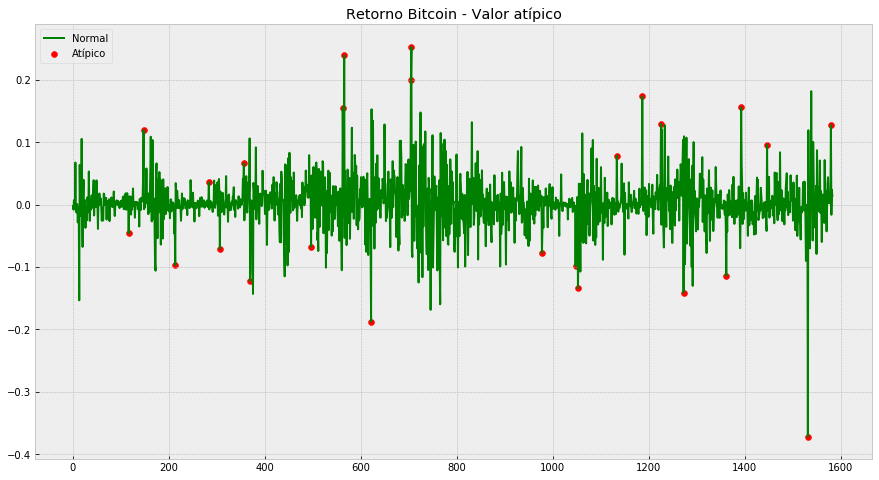

In [13]:
plot.style.use('bmh')
fig, ax = plot.subplots(figsize=(15,8))

ax.plot(btc_outliers.index, btc_outliers.Return, color='green', label='Normal') 
ax.scatter(outliers.index, outliers.Return, color='red', label='Atípico') # punto rojo para los outliers
ax.set_title("Retorno Bitcoin - Valor atípico")
ax.legend(loc='upper left')

# Algunos cálculos estadísticos

## Activando las librerias necesarias

In [14]:
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

## Estadistica descriptiva

In [15]:
btc.describe()

,High,Low,Open,Close,Volume,Adj_Close,Return
count,1584.000000,1584.000000,1584.000000,1584.000000,1.584000e+03,1584.000000,1583.000000
mean,5258.694669,4973.955256,5121.251427,5126.497484,8.691945e+09,5126.497484,0.002753
std,4032.227874,3746.977502,3902.234660,3901.679117,1.139719e+10,3901.679117,0.040679
min,374.950012,354.914001,365.072998,364.330994,2.851400e+07,364.330994,-0.371695
25%,1004.340012,953.975479,976.328735,985.485764,1.868252e+08,985.485764,-0.012013
50%,5237.065918,4937.672119,5061.997314,5065.798096,4.275625e+09,5065.798096,0.001993
75%,8219.481934,7838.148071,8041.255493,8044.845093,1.369261e+10,8044.845093,0.017936
max,20089.000000,18974.099609,19475.800781,19497.400391,7.415677e+10,19497.400391,0.252472


## Cálculo del rango

In [16]:
rango = btc.Adj_Close.max() - btc.Adj_Close.min()
rango

19133.069396972656

## Cálculo de la media

In [17]:
media = btc.Adj_Close.mean()
media

5126.497483552104

## Cálculo de la desviación estándar

In [18]:
desviacion = btc.Adj_Close.std()
desviacion

3901.6791166780226

## Normalización

In [19]:
norm_pdf = scs.norm.pdf(rango, loc=media, scale=desviacion) 

## Gráfico Histograma y Q-Q Plot del Cierre Ajustado

Text(0.5, 1.0, 'Q-Q plot Cierre Ajustado')

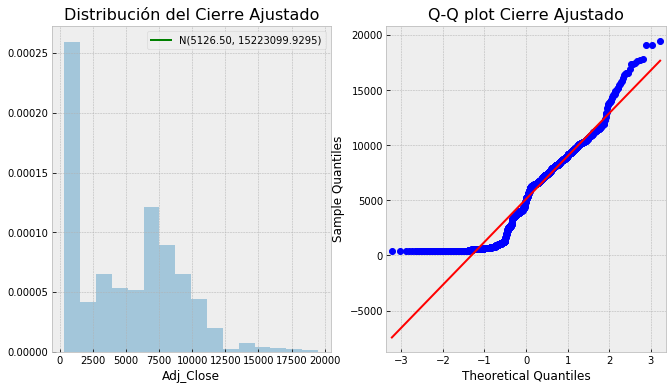

In [20]:
plot.style.use('bmh')
fig, ax = plot.subplots(1, 2, figsize=(11, 6))

# Histograma
sns.distplot(btc.Adj_Close, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Distribución del Cierre Ajustado', fontsize=16) 
ax[0].plot(rango, norm_pdf, 'g', lw=2, label=f'N({media:.2f}, {desviacion**2:.4f})')
ax[0].legend(loc='upper right');

# Q-Q plot
qq = sm.qqplot(btc.Adj_Close.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot Cierre Ajustado', fontsize = 16)


# Prueba de Dickey-Fuller aumentado

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [22]:
def adf_test(x):
    
    indices = ['Test Estadistico', 'p-valor',
               '# Lags usados', '# Observaciones usadas']
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Valor Critico ({key})'] = value

    return results

In [23]:
adf_test(btc.Adj_Close)

Test Estadistico            -1.962060
p-valor                      0.303452
# Lags usados               21.000000
# Observaciones usadas    1562.000000
Valor Critico (1%)          -3.434543
Valor Critico (5%)          -2.863392
Valor Critico (10%)         -2.567756
dtype: float64

La hipótesis nula de la prueba ADF establece que la serie temporal no es 
estacionaria. Con un valor p de 0.30 (o equivalente, el estadístico de prueba mayor que el valor crítico para el nivel de confianza seleccionado), no tenemos motivos para rechazar la hipótesis nula, lo que significa que podemos concluir que la serie no es estacionaria.

## Gráficos de la función de Autocorrelación y Autocorrelación Parcial ( PACF / ACF )

In [24]:
Lags = 21 # ver si se pueden traer los valores de la prueba anterior, para automatizar los graficos
p_valor = 0.303452

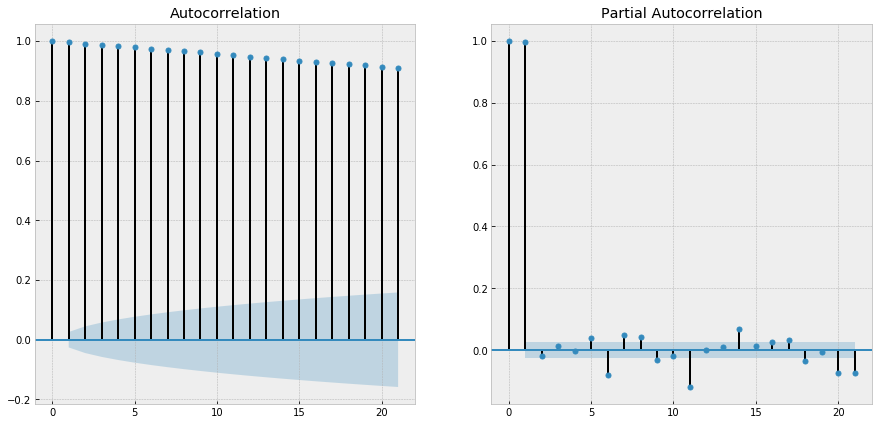

In [25]:
fig, ax = plot.subplots(1, 2, figsize=(15, 7))

ACF = plot_acf(btc.Adj_Close, ax=ax[0], lags=Lags, alpha=p_valor) # si se llama a una variable no repite el grafico
PACF = plot_pacf(btc.Adj_Close, ax=ax[1], lags=Lags, alpha=p_valor)

# Análisis predictivo con fbprophet

In [26]:
!conda install -c conda-forge --override-channels fbprophet
# https://www.ibm.com/support/pages/watson-studio-local-error-importing-fbprophet-module-python-notebook-modulenotfounderror-no-module-named-convertdate

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fbprophet-0.6              |   py36he1b5a44_0         642 KB  conda-forge
    gcc_impl_linux-64-7.3.0    |       hd420e75_5        70.6 MB  conda-forge
    holidays-0.10.2            |     pyh9f0ad1d_0          59 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    ephem-3.7.7.1              |   py36h516909a_0         722 KB  conda-forge
    pymeeus-0.3.7              |     pyh9f0ad1d_0         515 KB  conda-forge
    matplotlib-base-3.1.1      |   py36hfd891ef_0         6.7 MB  conda-forge
    gcc_linux-64-7.3.0         |      h553295d_18          22 KB  conda-forge
    korean_lunar_calendar-0.2.1|     pyh9f0ad1d_0          10 KB  conda-forge
    certifi-2

## Activando fbprophet

In [31]:
import fbprophet as fb
from fbprophet import Prophet

## Cambiando el nombre de las columnas para el algoritmo

In [34]:
btc.rename(columns={'Date': 'ds', 'Adj_Close': 'y'}, inplace=True)

## Definiendo dataframe de entrenamiento y de testeo

In [35]:
train_indices = btc.ds.apply(lambda x: x.year) < 2021
df_train = btc.loc[train_indices].dropna()
df_test = btc.loc[~train_indices].reset_index(drop=True)

In [36]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='daily', period=30.5, fourier_order=5)
model_prophet.fit(df_train)

INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
/opt/conda/envs/Python36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



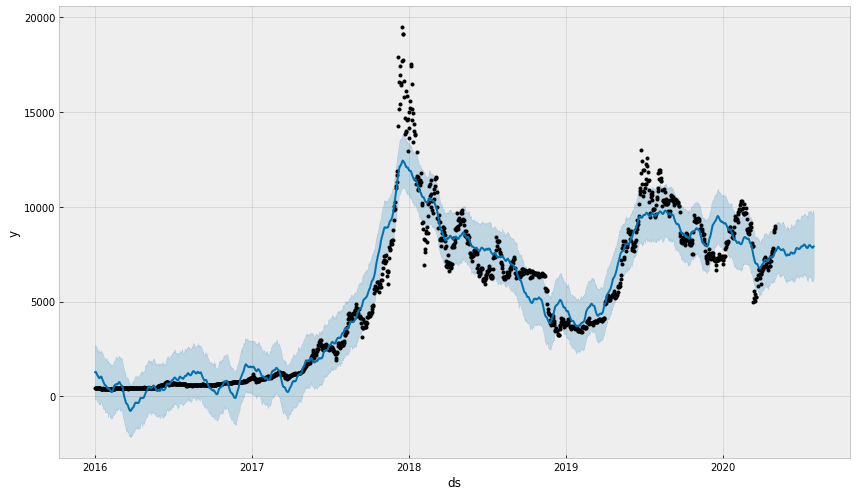

In [38]:
df_future = model_prophet.make_future_dataframe(periods=90)
df_pred = model_prophet.predict(df_future)
PREDICTIVO = model_prophet.plot(df_pred, figsize=(12, 7))